In [19]:
import tensorflow as tf
import numpy as np

# Полносвязные нейронные сети (Dense layer)

## Разбираем метод reshape

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [ ]:
train_data_reshaped = train_data.reshape(60000, 28*28)

In [ ]:
train_data[0]

In [ ]:
train_data_reshaped[0]

In [ ]:
train_data[0].shape

In [ ]:
train_data_reshaped[0].shape

In [ ]:
from matplotlib import pyplot

In [ ]:
pyplot.imshow(train_data[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Классифицируем IMDB отзывы - БИНАРНАЯ КЛАССИФИКАЦИЯ

Состав датасета - 50000 отзывов, 25000 позитивных, 25000 негативных

### Загружаем данные

In [ ]:
# Импортируем набор данных IMDB - встроен в keras
from tensorflow.keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)    # аргумент num_words=10000 говорит, что будут загружены только 10000 самых распространенных слов

# В датасете отзывы уже предобработаны и представлены в виде наборов целых чисел
train_data[0][0:6]

### Подготавливаем данные

In [ ]:
# Обработаем данные для отправки в нейронную сеть
# Необходимо понимать, что каждый вектор должен быть одной и той же длины, чтобы восприниматься нейронной сетью
# На данный момент у нас длина отзыва равна количеству слов в нем, что делает данные в таком виде непригодными для обучения нейросети
# Проведем векторизацию путем one-hot encoding
# Так как при загрузке данных мы указали, что из всего словаря использоваться будут только 10000 самых распространенных слов
# нам необходимо превратить каждый отзыв в вектор длиной 10000, где если слово в отзыве присутствует, будет стоять 1 в этом векторе, а если нет - 0
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))           # Создаем вектор из нулей длиной в 10000 самых рапространенных слов
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1                              # Если слово в отзыве совпадает со словарным, ставим на позицию словарного слова 1
  return results


# Векторизируем обучающие и тестовые данные
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train.shape

# Теперь тут у нас 25000 (0, 1) векторов длиной 10000

In [ ]:
x_train[0]

In [ ]:
# Также векторизируем целевые переменные
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Создаем нейросеть

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
# Инициализируем последовательную модель
model = models.Sequential()

# Добавляем первый скрытый слой, функцию активации и также определяем, в какой форме будут поступать входящие данные из нашего набора данных
# В этом скрытом слое содержится 16 нейронов
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))

# Добавляем второй скрытый слой и функцию активации
# keras автоматически определит форму входящих данных
model.add(layers.Dense(16, activation='relu'))

# Добавляем последний слой вывода с функцией активации, подходящей для бинарной классификации
# Вероятность отношения значения на выходе к классу 0 или 1
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Компиляция - необходимый шаг для тренировки модели
# На этом шаге мы конфигурируем, при помощи каких параметров модель будет отслеживать своё обучение и выбирать дальнейшее направление
# данный пример показывает, как можно сконфигурировать оптимизатор, функцию потерь и метрики качества
from tensorflow.keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),     # стохастический градиентный спуск будет использовать данный оптимизатор
              loss=losses.binary_crossentropy,            # функция потерь хорошо подходит для бинарной классификации, по ней модель отслеживает, в какую сторону изменять веса
              metrics=[metrics.binary_accuracy])          # точность показывает насколько предсказанные значения совпадают с существующими

### Настраиваем валидационную выборку

In [ ]:
# Валидационная выборка необходима, чтобы оценивать точность модели в процессе обучения нейронной сети на данных, которые она ранее не видела
x_val = x_train[:10000]               # В данном случае, валидационная выборка содержит в себе первые 10000 из 25000 наблюдений датасета
partial_x_train = x_train[10000:]     # А выборка для обучения - данные за исключением валидационной выборки

# Не забываем настроить целевую переменную
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Обучим модель

In [ ]:
# Будем записывать результаты обучения в переменную-словарь, чтобы потом строить диаграммы
history = model.fit(partial_x_train,                              # данные для обучени
                    partial_y_train,                              # целевые переменные для обучения
                    epochs=20,                                    # количество эпох, в течение которых модель будет обучаться
                    batch_size=512,                               # в каждую эпоху, модель будет обучаться на 512 элементах данных для обучения
                    validation_data=(x_val, y_val),               # данные для валидации
                    verbose=0)                                    # результаты обчения по эпохам не будут выводиться           

### Поработаем с результатами

In [ ]:
# Обратимся к объекту history
history_dict = history.history

# Посмотрим на ключи этого словаря
history_dict.keys()

# Они предлагают отличную возможность построить несколько диаграмм, иллюстрирующих процесс обучения

In [ ]:
import matplotlib.pyplot as plt

# Значения функции потерь на данных для обучения
loss_values = history_dict['loss']

# Значения функции потерь на данных для валидации
val_loss_values = history_dict['val_loss']

# Симулируем нумерацию эпох для построения диаграмм в интервале [1, 20]
epochs = range(1, len(loss_values)+1)

# Строим диаграммы функции потерь на данных для обучения и валидации
plt.plot(epochs, loss_values, 'b', label='Потери на обучении')         # Потери обучения, синяя линия
plt.plot(epochs, val_loss_values, 'r', label='Потери на валидации')    # Потери валидации, красная линия
plt.title('Потери на обучении и валидации')                            # Название диаграммы
plt.xlabel('Эпохи')                                                    # Название оси х
plt.ylabel('Значения функции потерь')                                  # Название оси у
plt.legend()                                                           # Отображение легенды
plt.show()                                                             # Отображение диаграммы

In [ ]:
# Теперь посмотрим на диаграммы, иллюстрирующие изменение точности предсказаний в процессе обучения
plt.clf()                                                               # Очищаем поле диаграммы
acc_values = history_dict['binary_accuracy']                            # Данные по точности на обучающих данных
val_acc_values = history_dict['val_binary_accuracy']                    # Данные по точности на валидационных данных

# Строим диаграмму
plt.plot(epochs, acc_values, 'b', label='Точность на обучении')         # Точность обучения, синяя линия
plt.plot(epochs, val_acc_values, 'r', label='Точность на валидации')    # Точность валидации, красная линия
plt.title('Точность на обучении и валидации')                           # Название диаграммы
plt.xlabel('Эпохи')                                                     # Название оси х
plt.ylabel('Значения точности')                                         # Название оси у
plt.legend()                                                            # Отображение легенды
plt.show()                                                              # Отображение диаграммы

Учитывая, что где-то в районе 4й эпохи данные на валидации начали ухудшаться, одним из решений будет сократить время обучения нейронной сети до 4 эпох.

## Классифицируем новости (Reuters corpus) - МУЛЬТИКЛАССОВАЯ КЛАССИФИКАЦИЯ (single-label)

In [ ]:
# Импортируем датасет
from tensorflow.keras.datasets import reuters

# Загружаем данные
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
# Подготовим данные для дальнейшей загрузки их в нейросеть
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# Для того, чтобы преобразовать данные для обучения, необходимо применить метод one-hot encoding
# Используем стандартную библиотеку keras для этого
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
# Создадим архитектуру нашей модели для мультиклассовой классификации
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))       # Использование softmax в качестве активационной функции позволяет выдать как вывод распределение вероятности
                                                        # по всему пространству классов, присутствующему в оригинальном датасете

In [ ]:
# Скомпилируем модель
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Разделим данные на валидационные и обучающие
# Первая тысяча наблюдений [0 - 9999] - валидационная
x_val = x_train[:1000]
y_val = y_train[:1000]

# Остальные данные - обучающие
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [ ]:
# Обучим модель
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0
                    )

In [ ]:
history.history.keys()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Свёрточные нейронные сети (Conv2D)

## Введение в свёрточные сети

### Загрузка и подготовка данных

In [ ]:
# Для согласования версий интерпретаторов и используемых функций
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
# импортируем библиотеку tensorflow
import tensorflow as tf

In [ ]:
# Для создания последовательной модели нейронной сети
from tensorflow.keras.models import Sequential
# Импортируем необходимые слои для свёрточной нейронной сети
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
# Для работы с изображениями
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Для чтения файлов и структуры папок
import os
# Для работы с массивами
import numpy as np
# Для визуализации
import matplotlib.pyplot as plt

In [ ]:
# Ссылка для получения данных котиков и пёсиков, уже разложено по категориям и разделено на подвыборки
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Загружаю файл по ссылке
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [ ]:
# Прописываем пути нахождения изображений
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # Путь для обучающих данных, котики
train_dogs_dir = os.path.join(train_dir, 'dogs')  # Путь для обучающих данных, пёсели
validation_cats_dir = os.path.join(validation_dir, 'cats')  # Путь для валидационных данных, котики
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # Путь для валидационных данных, пёсели

In [ ]:
# Проверим количество изображений с котиками и пёселями в соответствующих папках
# Обучающие котики
num_cats_tr = len(os.listdir(train_cats_dir))
# Обучающие пёсели
num_dogs_tr = len(os.listdir(train_dogs_dir))

# Валидационные котики
num_cats_val = len(os.listdir(validation_cats_dir))
# Валидационные пёсели
num_dogs_val = len(os.listdir(validation_dogs_dir))

# Всего изображений для обучени
total_train = num_cats_tr + num_dogs_tr
# Всего изображений для валидации
total_val = num_cats_val + num_dogs_val

print('Всего изображений котиков для обучения:', num_cats_tr)
print('Всего изображений пёселей для обучения:', num_dogs_tr)

print('Всего изображений котиков для валидации:', num_cats_val)
print('Всего изображений пёселей для валидации:', num_dogs_val)
print("--")
print("Всего изображений для обучения:", total_train)
print("Всего изображений для валидации:", total_val)

Всего изображений котиков для обучения: 1000
Всего изображений пёселей для обучения: 1000
Всего изображений котиков для валидации: 500
Всего изображений пёселей для валидации: 500
--
Всего изображений для обучения: 2000
Всего изображений для валидации: 1000


In [ ]:
# Для удобства определим несколько параметров обучения
# Размер подвыборки для обучения
batch_size = 128
# Количество эпох
epochs = 40
# Высота изображения
IMG_HEIGHT = 150
# Ширина изображения
IMG_WIDTH = 150

In [ ]:
# Следующее, что необходимо сделать - подготовить данные для отправки в модель.
# Можно определить следующие шаги:
# Запись изображений в память
# Декодирование изображений в соответствующий матрично-канальный формат
# Преобразование изображений в тензоры с плавающейт точкой
# Изменение значений внутри тензоров из диапазона 0-255 в диапазон 0-1, так как нейронные сети лучше обучаются на данных унифицированной шкалы

# Все эти шаги можно сделать при помощи класса ImageDataGenerator из модуля tf.keras
# Создаю генераторы для обучающей и валидационной выборок
train_image_generator = ImageDataGenerator(rescale=1./255) # Генератор для обучающей выборки
validation_image_generator = ImageDataGenerator(rescale=1./255) # Генератор для валидационной выборки

In [ ]:
# flow_from_directory метод загружает файлы, уменьшает размерность тензоров и измерения изображения
# Параметры, используемые в данном случае:
# batch_size - количество обработанных изображений, которое за раз выдаст генератор
# directory - путь, по которому лежат изобрадения, неждающиеся в предобработке
# shuffle - будут ли перемешаны изображения при попадании в генератор
# target_size - размер изображений на выходе
# class_mode - для бинарной классификации выбираю binary

# Для обучающей выборки
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

# Для валидационной выборки
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Визуализируем изображения после обработки генератором

# Функция next() возвращает батч из (в данном случае) набора данных для обучения
# Возвращаемое этой функцией значение имеет вид x_train, y_train
# Для визуализации изображений избавляюсь от y_train путем использования _ как имени соответствующей переменной
sample_training_images, _ = next(train_data_gen)

In [ ]:
# Визуализируем изображения в формате пять-в-ряд
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

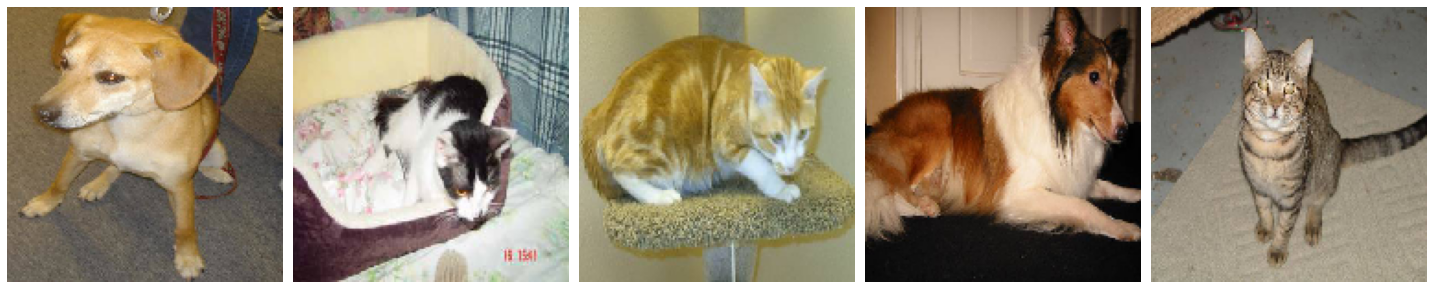

In [ ]:
plotImages(sample_training_images[:5])

### Создание модели

In [ ]:
# Модель состоит из четырёх свёрточных блоков, перемежающихся слоями сжатия
# Далее данные из формы многомерной матрицы переводятся в одномерный тензор и отправляются в полносвязный слой с функцией активации relu
# Затем еще один полносвязный слой, используя сигмоидную функцию активации, проводит бинарную классификацию сэмпла

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Компилирую модель
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Оцениваю структуру модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

### Обучение модели

In [ ]:
# fit_generator - это метод класса ImageDataGenerator, созданный как раз для того, чтобы работать с объектами-генераторами
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/40
15/15 [==============================] - 15s 751ms/step - loss: 0.7394 - accuracy: 0.5171 - val_loss: 0.6914 - val_accuracy: 0.5257
Epoch 2/40
15/15 [==============================] - 10s 677ms/step - loss: 0.6870 - accuracy: 0.5443 - val_loss: 0.6682 - val_accuracy: 0.5513
Epoch 3/40
15/15 [==============================] - 10s 671ms/step - loss: 0.6822 - accuracy: 0.5566 - val_loss: 0.6659 - val_accuracy: 0.5100
Epoch 4/40
15/15 [==============================] - 11s 734ms/step - loss: 0.6637 - accuracy: 0.5887 - val_loss: 0.6396 - val_accuracy: 0.6261
Epoch 5/40
15/15 [==============================] - 10s 674ms/step - loss: 0.6241 - accuracy: 0.6496 - val_loss: 0.6252 - val_accuracy: 0.6562
Epoch 6/40
15/15 [==============================] - 10s 670ms/step - loss: 0.6027 - accuracy: 0.6859 - val_loss: 0.5952 - val_accuracy: 0.6897
Epoch 7/40
15/15 [==============================] - 10s 676ms/step - loss: 0.5483 - accuracy: 0.7233 - val_loss: 0.5541 - val_accuracy: 0.7098

### Визуализация результатов процесса обучения

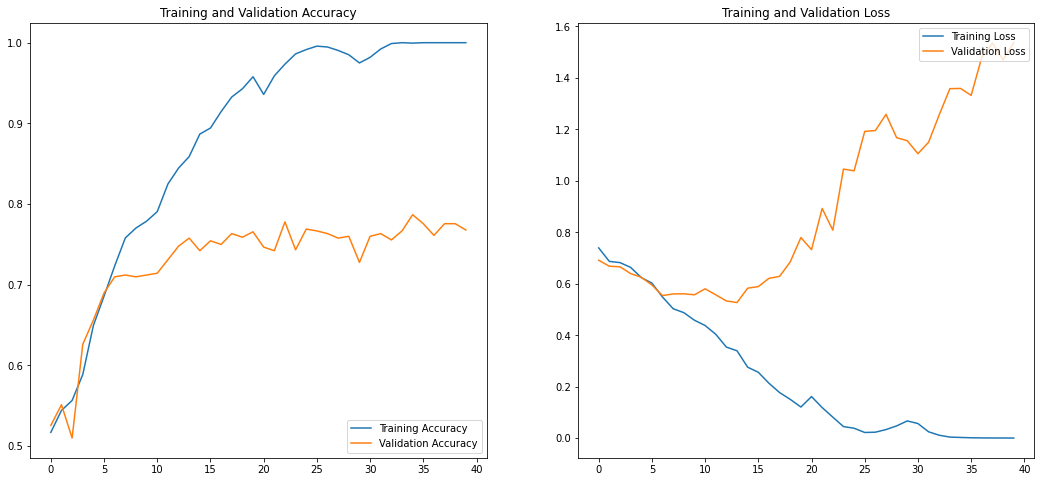

In [ ]:
# Так как я записала модель вместе с процессом обучения в переменную history, теперь у меня есть возможность
# достать из этой переменной необходимые данные
# Точность модели на обучающей выборке
acc = history.history['accuracy']
# Точность модели на валидационной выборке 
val_acc = history.history['val_accuracy']

# Функция потерь на обучающей выборке
loss = history.history['loss']
# Функция потерь на валидационной выборке
val_loss = history.history['val_loss']

# Колиечество эпох обучения для оси х
epochs_range = range(epochs)

# Строю соответствующие диаграммы
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Модель можно сохранить
model.save('cats_and_dogs_small_1.h5')

Очевидно, что на доступных данных после 5 эпохи модель начала серьёзно переобучаться. Такое часто случается, когда данных недостаточно, чтобы качественно генерализировать параметры. Один из способов борьбы с переобучением на малом количестве данных - увеличение количества сэмплов путем трансформаций изображений: отражения, поворота и так далее. Рассмотрим данный метод

## Искусственная аугментация датасета (увеличение количества сэмплов при помощи матричных трансформаций) как метод борьбы с переобучением

### Для обучающих данных

In [ ]:
# Создаем объект класса ImageDataGenerator, которые будет последовательно приводить данные из диапаона 0-255 в диапазон 0-1,
# поворачивать изображение на 45 градусов, смещать по ширине и высоте (перемещать изображение вверх и вниз),
# отражать по горизонтали и приближать произвольным образом
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    )

In [ ]:
# Создаем генератор, который использует вышеописанные трансформации
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


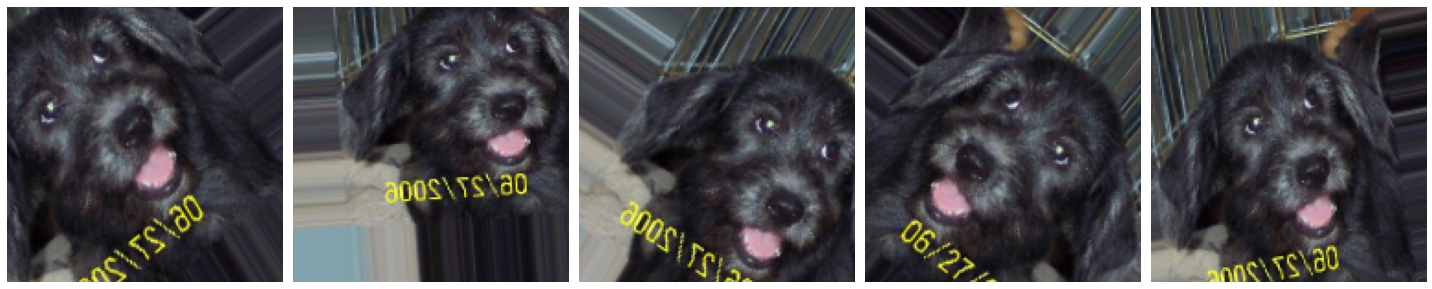

In [ ]:
# Визуализируем результат
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### У валидационных данных оставляем только смену диапазона значений RGB

In [ ]:
# Изменяем диапазон с 0-255 до 0-1
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
# Создаем генератор, включающий в себя вышеуказанное изменение изображений
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## Dropout (произвольное обнуление весов в процессе обучения с целью борьбы с переобучением)

In [ ]:
# Модель состоит из четырёх свёрточных блоков, перемежающихся слоями сжатия. Перед полносвязным слоем используем сброс весов.
# Далее данные из формы многомерной матрицы переводятся в одномерный тензор и отправляются в полносвязный слой с функцией активации relu
# Затем еще один полносвязный слой, используя сигмоидную функцию активации, проводит бинарную классификацию сэмпла

model_new = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

### Компиляция новой модели

In [ ]:
# Компилирую новую модель
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 128)     

### Обучение новой модели


In [ ]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

model_new.save('cats_and_dogs_small_2.h5')

Epoch 1/40
15/15 [==============================] - 21s 1s/step - loss: 0.7419 - accuracy: 0.5037 - val_loss: 0.6911 - val_accuracy: 0.5011
Epoch 2/40
15/15 [==============================] - 19s 1s/step - loss: 0.6930 - accuracy: 0.5069 - val_loss: 0.6922 - val_accuracy: 0.4989
Epoch 3/40
15/15 [==============================] - 19s 1s/step - loss: 0.6920 - accuracy: 0.5176 - val_loss: 0.6870 - val_accuracy: 0.4967
Epoch 4/40
15/15 [==============================] - 19s 1s/step - loss: 0.6869 - accuracy: 0.5240 - val_loss: 0.6780 - val_accuracy: 0.5725
Epoch 5/40
15/15 [==============================] - 20s 1s/step - loss: 0.6784 - accuracy: 0.5561 - val_loss: 0.6473 - val_accuracy: 0.6060
Epoch 6/40
15/15 [==============================] - 20s 1s/step - loss: 0.6749 - accuracy: 0.5604 - val_loss: 0.6539 - val_accuracy: 0.6239
Epoch 7/40
15/15 [==============================] - 20s 1s/step - loss: 0.6641 - accuracy: 0.5978 - val_loss: 0.6209 - val_accuracy: 0.6473
Epoch 8/40
15/15 [==

### Визуализация результатов

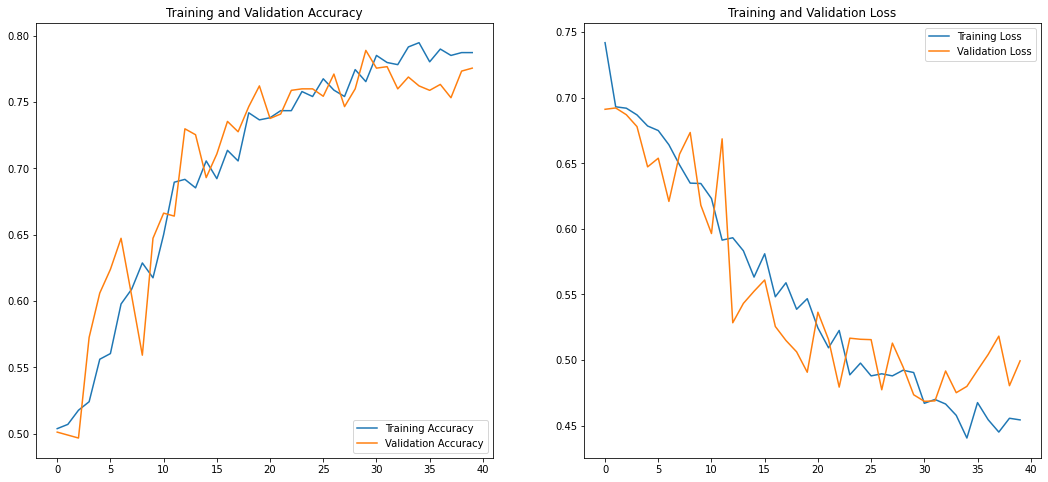

In [ ]:
# Так как я записала модель вместе с процессом обучения в переменную history, теперь у меня есть возможность
# достать из этой переменной необходимые данные
# Точность модели на обучающей выборке
acc = history.history['accuracy']
# Точность модели на валидационной выборке 
val_acc = history.history['val_accuracy']

# Функция потерь на обучающей выборке
loss = history.history['loss']
# Функция потерь на валидационной выборке
val_loss = history.history['val_loss']

# Колиечество эпох обучения для оси х
epochs_range = range(epochs)

# Строю соответствующие диаграммы
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Используем предобученную сеть

### Выделение признаков - Feature extraction

Суть данного метода заключается в использовании образов (representations), полученных предварительно обученной сетью, на новом датасете с целью выделить новые интересные признаки. Эти признаки затем используются уже с новым классификатором, обученным с нуля.

В предыдущих примерах было установлено, что обучение свёрточных сетей состоит из двух этапов. **Первый** этап состоит из последовательности свёрточных (Conv2D) слоев и слоев подвыборки (Pooling), за которым затем следует **второй** этап - полносвязный (Dense), где результатам присваиваются вероятности принадлежности к тому или иному классу.

Первый этап называется **свёрточной базой** модели. В контексте свёрточных сетей выделение признаков состоит из использования свёрточной базы предварительно обученной модели, прогона через нее нового набора данных и обучения нового классификатора на основе предыдущих шагов:

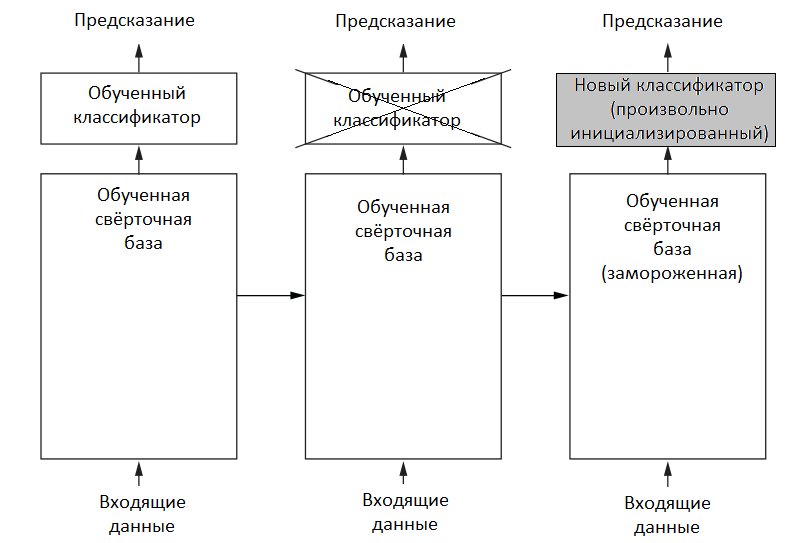

В данной работе я использую предобученную свёрточную сеть, входящую в состав keras: VGG16

In [ ]:
# Импортирую свёрточную сеть
from tensorflow.keras.applications import VGG16

# Инициализирую и определяю свёрточную базу из этой сети
conv_base = VGG16(weights='imagenet',                         # Указываю начальные веса с которых будет инициализирована модель
                  include_top=False,                          # Не включаю полносвязный классификатор (в сети ImageNet более 1000 классов, меня в работе интересуют только 2)
                  input_shape=(150, 150, 3))                  # Параметры изображений моих входных данных

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# Посмотрим на сводную по модели
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Глубокое обучение для текстов и рядов данных

Данный подраздел глубокого обучения имеет дело с текстовыми данными (или, иными словами, последовательностью символов), временными рядами и рядами данных в более обобщенном смысле.

Два фундаментальных алгоритма для работы с подобными данными - рекуррентные нейронные сети и свёрточные нейронные сети 1D (Conv1D слои).

Области применения глубокого обучения при анализе рядов данных:
- Классификация документов, например, тем статей или авторов книг;
- Сравнение временных рядов, например, насколько похожи два документа;
- Перевод;
- Смысловой анализ ряда, например, отрицательная или положительная классификация отзыва;
- Предсказание будущих значений временного ряда, например, погоды или биржевых индексов.

## Работа с текстовыми данными. Глубокое обучение для обработки естественного языка.

Два метода векторного представления текста: one-hot encoding и word embedding. 

**One-hot encoding** - создает для каждого слова вектор из нулей длиной со словарь (обычно словарь ограничивается 1000, 10000, 20000 самых распространенных слов). На позиции словаря, где встречается слово, ставится 1. Кодируется вручную, занимает много памяти, содержа много измерений.

**Word-embedding** - метод, при котором модель машинного обучения сама создает векторы слов в процессе обучения. Отличается значительно меньшим количеством измерений, не требует кодировки вручную. Инициализируется произвольными векторам, схоже с тем, как инициализируются начальные веса в обучении нейронных сетей.

### Word-embedding векторизация текстовых данных

In [20]:
# Создаю экземпляр слоя Embedding
# Импортирую библиотеку
from tensorflow.keras.layers import Embedding

# Создаю экземпляр
embedding_layer = Embedding(1000, 64)       # Первый параметр - максимальное количество токенов, второй - размерность 

# В качестве входных данных, слой Embedding принимает 2D тензоры следующей формы: (samples, sequence_length)
# Например, тензор формы (32, 15) означает, что на вход пойдет 32 сэмпла длиной 15 каждый. Длина ряда для каждого набора сэмплов фиксирована и одинакова,
# соответственно, ряды короче должны быть дополнены 0, а ряды длиннее - обрезаны.

# Слой Embedding возвращает 3D тензор формы (samples, sequence_length, embedding_dimensionality)
# Данный тензор затем поступает в рекуррентный или Conv1D слой.

In [21]:
# Загрузка IMDB отзывов
from tensorflow.keras.datasets import imdb
from keras import preprocessing

max_features = 10000              # Количество слов, расценивающихся как признаки. Наиболее распространенные слова в словаре
maxlen = 20                       # Обрезка текста после этого количества слов (принадлежащих к max_features количеству слов)

# Загружаю данные как список целых чисел
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Превращаю списки из предыдущего шага в 2D тензор целых чисел формы (samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [22]:
# Необходимый импорт
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Инициализация последовательной модели
model = Sequential()
# Добавляю слой, который займется созданием пространства векторов образов, 8 dimensional
model.add(Embedding(10000, 8, input_length=maxlen))
# На выходе этого слоя имею векторы формы (samples, maxlen, 8)
# Меняю форму пространства векторов образов в форму (samples, maxlen * 8)
model.add(Flatten())
# Отправляю пространство векторов образов в полносвязный слой для бинарной классификации
model.add(Dense(1, activation='sigmoid'))

# Компилирую модель
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Обучаю модель
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6783 - acc: 0.5914 - val_loss: 0.6374 - val_acc: 0.6928
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5587 - acc: 0.7427 - val_loss: 0.5324 - val_acc: 0.7244
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4684 - acc: 0.7848 - val_loss: 0.5016 - val_acc: 0.7486
Epoch 4/10
625/625 [==============================] - 2s 2ms/step - loss: 0.4251 - acc: 0.8071 - val_loss: 0.4940 - val_acc: 0.7536
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3966 - acc: 0.8219 - val_loss: 0.4947 - val_acc: 0.7560
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3729 - acc: 0.8368 - val_loss: 0.4966 - val_acc: 0.7568
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3523 - acc: 0.8493 - val_loss: 0.5043 - val_acc: 0.7568
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

### Работа с сырым текстом, использование предобученного векторного пространства

#### Загрузка сырых данных, тот же IMDB датасет

In [24]:
# Загружаю данные
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz      # curl = client url, -O = имя загруженного файла = имя загружаемого файла

# Разархивирую данные
!tar -xf aclImdb_v1.tar.gz                        # -xf = extract file

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  14.7M      0  0:00:05  0:00:05 --:--:-- 19.3M


In [25]:
# Что содержится в папке aclImdb, которая была разархивирована ранее
!ls aclImdb                               # ls = list, просмотр каталога

imdbEr.txt  imdb.vocab	README	test  train


In [26]:
# Что содержится в подпапке test
!ls aclImdb/test

labeledBow.feat  neg  pos  urls_neg.txt  urls_pos.txt


In [27]:
# Что содержится в подпапке train
!ls aclImdb/train

labeledBow.feat  pos	unsupBow.feat  urls_pos.txt
neg		 unsup	urls_neg.txt   urls_unsup.txt


Обе подпапки (test и train) содержат в себе положительные и отрицательные отзывы, разложенные по соответствующим папкам

In [28]:
# Посмотрим на один из таких отзывов
!cat aclImdb/train/pos/6248_7.txt

Being an Austrian myself this has been a straight knock in my face. Fortunately I don't live nowhere near the place where this movie takes place but unfortunately it portrays everything that the rest of Austria hates about Viennese people (or people close to that region). And it is very easy to read that this is exactly the directors intention: to let your head sink into your hands and say "Oh my god, how can THAT be possible!". No, not with me, the (in my opinion) totally exaggerated uncensored swinger club scene is not necessary, I watch porn, sure, but in this context I was rather disgusted than put in the right context.<br /><br />This movie tells a story about how misled people who suffer from lack of education or bad company try to survive and live in a world of redundancy and boring horizons. A girl who is treated like a whore by her super-jealous boyfriend (and still keeps coming back), a female teacher who discovers her masochism by putting the life of her super-cruel "lover" 

In [29]:
# Так как меня интересуют только папки с положительными и отрицательными отзывы, остальные папки можно удалить
!rm aclImdb/train/unsup -r        # rm = remove, -r - позволяет удалить папку и все содержимое

#### Разметка сырых данных

Утилита tf.keras.preprocessing.text_dataset_from_directory позволяет разметить данные, находящиеся в разных папках. Я использую её, чтобы разметить данные для обучения, валидации и проверки. 

Важно помнить, что, используя параметры validation_split & subset, необходимо либо зафиксировать генератор случайных чисел (параметр random seed), или передать значение параметру shuffle=False, в целях недопущения пересечения данных для обучения и валидации.

In [30]:
# Размер партии
batch_size = 32
# Определяю сырые данные для обучения
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory('aclImdb/train',                    # Откуда брать данные
                                                                  batch_size=batch_size,              # Сколько данных за раз извлекать
                                                                  validation_split=0.2,               # Какая часть данных пойдет на валидацию
                                                                  subset='training',                  # К какому подмножеству принадлежат данные (обучение)
                                                                  seed=4221)                          # Фиксирую генератор случайных чисел
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory('aclImdb/train', 
                                                                batch_size=batch_size, 
                                                                validation_split=0.2, 
                                                                subset='validation',                  # Подмножество валидации
                                                                seed=4221)                            # Тот же генератор
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory('aclImdb/test', 
                                                                 batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [31]:
print('Количество партий в raw_train_ds: %d' % tf.data.experimental.cardinality(raw_train_ds))
print('Количество партий в raw_val_ds: %d' % tf.data.experimental.cardinality(raw_val_ds))
print('Количество партий в raw_test_ds: %d' % tf.data.experimental.cardinality(raw_test_ds))

Количество партий в raw_train_ds: 625
Количество партий в raw_val_ds: 157
Количество партий в raw_test_ds: 782


Важно визуально исследовать сырые данные, чтобы впоследствии быть уверенными, что методы токенизации и нормализации отработают ожидаемым образом.

In [32]:
# Исследую 5 первых вхождений в первой партии данных для обучения
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(5):
    print(f"Отзыв: {text_batch.numpy()[i]}")
    print(f"Метка отзыва: {label_batch.numpy()[i]}")

Отзыв: b"Yeah, the poster is quite a horrible piece of work.<br /><br />I thought the movie was OK...nothing really outstanding...I just was hoping that he would be a hardcore druggie and totally trash his life.<br /><br />Ahh, but that can't happen to rich kids now can it? Not to the son of a wealthy businessman who holds big ballroom parties and has a nice manicured lawn on the front of the mini mansion.<br /><br />No...the kid is too good to have his life totally trashed. After all, who will drive the brand new SUV and who will go to law school? <br /><br />Ah, the poor little rich kids...in their quaint pretty house, with their ivy league schools, ultra clean homes and socialite parties...what will the world do without them? <br /><br />I hope they all get addicted to drugs, pass-away their life and end up in jail...so maybe we can see movies that don't all revolve around the poor little rich boys and girls of the surreal world."
Метка отзыва: 1
Отзыв: b'I\'m not a follower of a ce

#### Подготовка сырых данных

Удаляю тэги `<br />`

In [33]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import string
import re

# После того, как я визуально исследовала несколько элементов набора данных для обучения, оказалось, что в этих данных
# присутсвуют HTML тэги. Стандартизатор не может удалить эти тэги, поэтому необходимо написать специализированную функцию для
# удаления этих тэгов.
def custom_standardization(input_data):
  # Привожу символы к нижнему регистру
  lowercase = tf.strings.lower(input_data)
  # Заменяю <br> тэги на пробелы
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  # Функция возвращает данные без знаков препинания и тэгов
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

# Параметры векторизации
max_features = 20000              # 20000 самых распространенных слов
embedding_dim = 128               # 128 измерений
sequence_length = 500             # Обрезка отзыва после 500 слов


# Создаю экземпляр слоя text vectorization
# В этом слое слова заменены на целые числа, так что каждый отзыв представляет собой вектор целых чисел
vectorize_layer = TextVectorization(
    standardize=custom_standardization,           # Избавляюсь от тэгов
    max_tokens=max_features,                      # 20000 самых популярных слов
    output_mode='int',                            # Целочисленный вывод
    output_sequence_length=sequence_length)       # Привожу каждый вектор к единой длине


# Создав словарный слой, пришло время для векторизации отзывов
# Убираю разметку (принадлежность к 0 или 1 классу)
text_ds = raw_train_ds.map(lambda x, y: x)
# Запускаю процесс векторизации
vectorize_layer.adapt(text_ds)

#### Два способа векторизации данных

Слой text vectorization может быть **использован как часть модели**, в результате чего модель может обрабатывать сырой текст в виде:


```
text_input = tf.keras.Input(shape=(1,), dtype=tf.string, name='text')
x = vectorize_layer(text_input)
x = layers.Embedding(max_features + 1, embedding_dim)(x)
...
```

Или же слой text vectorization может быть **применен к набору данных** с целью получения индекса слов, чтобы в дальнейшем направить реузльтат в модель, ожидающую на вход целые числа.

Второй метод показывает наилучшие результаты при использовани GPU для обучения моделей, поэтому в данной работе применяю его.

Однако, первый метод используется, когда есть цель выпустить затем модель в работу.

In [34]:
# Определяю функцию для векторизации текстовых данных
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

# Векторизирую данные
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

# Асинхронный захват данных/буферизация для наилучшей производительности при использовании GPU
train_ds = train_ds.cache().prefetch(buffer_size=10)
val_ds = val_ds.cache().prefetch(buffer_size=10)
test_ds = test_ds.cache().prefetch(buffer_size=10)

#### Создание модели

In [35]:
from tensorflow.keras import layers

# Целочисленный ввод для индексов словаря
inputs = tf.keras.Input(shape=(None,), dtype='int64')

# Далее добавляю слой, чтобы сопоставить эти индексы словаря и пространство измерений текста
# 'embedding_dim'. max_features + 1 - необходимая коррекция.
x = layers.Embedding(max_features + 1, embedding_dim)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3)(x)
x = layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# Добавляю полносвязный слой после сверточного
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Полносвязный слой предсказаний с сигмоидной функцией активации
predictions = layers.Dense(1, activation='sigmoid', name='predictions')(x)

model = tf.keras.Model(inputs, predictions)

# Компилирую модель
model.compile(
    loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Обучение модели

In [36]:
epochs = 3

# Fit the model using the train and test datasets.
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/3
625/625 [==============================] - 138s 219ms/step - loss: 0.4822 - accuracy: 0.7369 - val_loss: 0.2926 - val_accuracy: 0.8826
Epoch 2/3
625/625 [==============================] - 125s 200ms/step - loss: 0.2172 - accuracy: 0.9137 - val_loss: 0.3257 - val_accuracy: 0.8850
Epoch 3/3
625/625 [==============================] - 128s 205ms/step - loss: 0.1065 - accuracy: 0.9622 - val_loss: 0.4926 - val_accuracy: 0.8652


#### Оценка качества модели на наборе данных для проверки

In [37]:
model.evaluate(test_ds)

782/782 [==============================] - 56s 71ms/step - loss: 0.5905 - accuracy: 0.8337


[0.5905066728591919, 0.8337200284004211]

#### Создание модели, способной воспринимать сырой текст как ввод

Модель создается с нуля на основании ранее обученных весов.

In [38]:
# Сырой текст как входные данные
inputs = tf.keras.Input(shape=(1,), dtype='string')
# Превращаю сырой текст в индексы словаря
indices = vectorize_layer(inputs)
# Превращаю индексы словаря в предсказания
outputs = model(indices)

# Конечная модель
end_to_end_model = tf.keras.Model(inputs, outputs)
end_to_end_model.compile(
    loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Тестирую с `raw_test_ds`, с результатом "сырой текст"
end_to_end_model.evaluate(raw_test_ds)

782/782 [==============================] - 45s 57ms/step - loss: 0.5905 - accuracy: 0.8337


[0.5905066132545471, 0.8337200284004211]